In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import csv   

#노트북 안에서 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [19]:
#결측 데이터인 201701,201702는 결측치 처리를 위해 2018 동월 데이터로 대체

subway201701 = pd.read_csv('subway_201701.csv', encoding='EUC-KR')
subway201702 = pd.read_csv('subway_201702.csv', encoding='EUC-KR')
subway201703 = pd.read_csv('subway_201703.csv', encoding='EUC-KR')
subway201704 = pd.read_csv('subway_201704.csv', encoding='EUC-KR')
subway201705 = pd.read_csv('subway_201705.csv', encoding='EUC-KR')
subway201706 = pd.read_csv('subway_201706.csv', encoding='EUC-KR')
subway201707 = pd.read_csv('subway_201707.csv', encoding='EUC-KR')
subway201708 = pd.read_csv('subway_201708.csv', encoding='EUC-KR')
subway201709 = pd.read_csv('subway_201709.csv', encoding='EUC-KR')
subway201710 = pd.read_csv('subway_201710.csv', encoding='EUC-KR')
subway201711 = pd.read_csv('subway_201711.csv', encoding='EUC-KR')
subway201712 = pd.read_csv('subway_201712.csv', encoding='EUC-KR')
subway201801 = pd.read_csv('subway_201801.csv', encoding='EUC-KR')
subway201802 = pd.read_csv('subway_201802.csv', encoding='EUC-KR')
subway201803 = pd.read_csv('subway_201803.csv', encoding='EUC-KR')
subway201804 = pd.read_csv('subway_201804.csv', encoding='EUC-KR')
subway201805 = pd.read_csv('subway_201805.csv', encoding='EUC-KR')
subway201806 = pd.read_csv('subway_201806.csv', encoding='EUC-KR')
subway201807 = pd.read_csv('subway_201807.csv', encoding='EUC-KR')
subway201808 = pd.read_csv('subway_201808.csv', encoding='EUC-KR')
subway201809 = pd.read_csv('subway_201809.csv', encoding='EUC-KR')
subway201810 = pd.read_csv('subway_201810.csv', encoding='EUC-KR')
subway201811 = pd.read_csv('subway_201811.csv', encoding='EUC-KR')
subway201812 = pd.read_csv('subway_201812.csv', encoding='EUC-KR')



In [20]:
#Data merge and correct data type

frames = [subway201701,subway201702,subway201703,subway201704,subway201705,subway201706,subway201707,subway201708,subway201709,subway201710,subway201711,subway201712,subway201801,subway201802,subway201803,subway201804,subway201805,subway201806,subway201807,subway201808,subway201809,subway201810,subway201811,subway201812]

total_subway = pd.concat(frames)
total_subway.columns = ['Date','Line','Station_ID','Station_Name','Entries_N','Exits_N','Update_Date']

#total_subway['Entries_N'] = total_subway['Entries_N'].astype(int)
#total_subway['Update_Date'] = total_subway['Update_Date'].astype(object)
total_subway['Date'] = pd.to_datetime(total_subway['Date'], format ='%Y%m%d')


total_subway.dtypes

Date            datetime64[ns]
Line                    object
Station_ID               int64
Station_Name            object
Entries_N                int64
Exits_N                  int64
Update_Date              int64
dtype: object

In [21]:
#Check if it is merged well
total_row_number = len(subway201703) + len(subway201704) + len(subway201705) + len(subway201706) + len(subway201707) + len(subway201708) + len(subway201709) + len(subway201710) + len(subway201711) + len(subway201712) + len(subway201801) + len(subway201802) + len(subway201803) + len(subway201804) + len(subway201805) + len(subway201806) + len(subway201807) + len(subway201808) + len(subway201809) + len(subway201810) + len(subway201811) + len(subway201812)

In [22]:
total_row_number

387063

In [23]:
#total_subway.columns
#total_subway.head()
total_subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421353 entries, 0 to 17728
Data columns (total 7 columns):
Date            421353 non-null datetime64[ns]
Line            421353 non-null object
Station_ID      421353 non-null int64
Station_Name    421353 non-null object
Entries_N       421353 non-null int64
Exits_N         421353 non-null int64
Update_Date     421353 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 25.7+ MB


In [24]:
#check null
total_subway.isnull().sum()

Date            0
Line            0
Station_ID      0
Station_Name    0
Entries_N       0
Exits_N         0
Update_Date     0
dtype: int64

In [25]:
null_columns=total_subway.columns[total_subway.isnull().any()]

In [26]:
print(total_subway[total_subway["Date"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [27]:
total_subway["year"] = total_subway["Date"].dt.year
total_subway["month"] = total_subway["Date"].dt.month
total_subway["day"] = total_subway["Date"].dt.day

total_subway.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1


C:\Users\choimh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,0,'day'), Text(0.5,1,'Entries per day')]

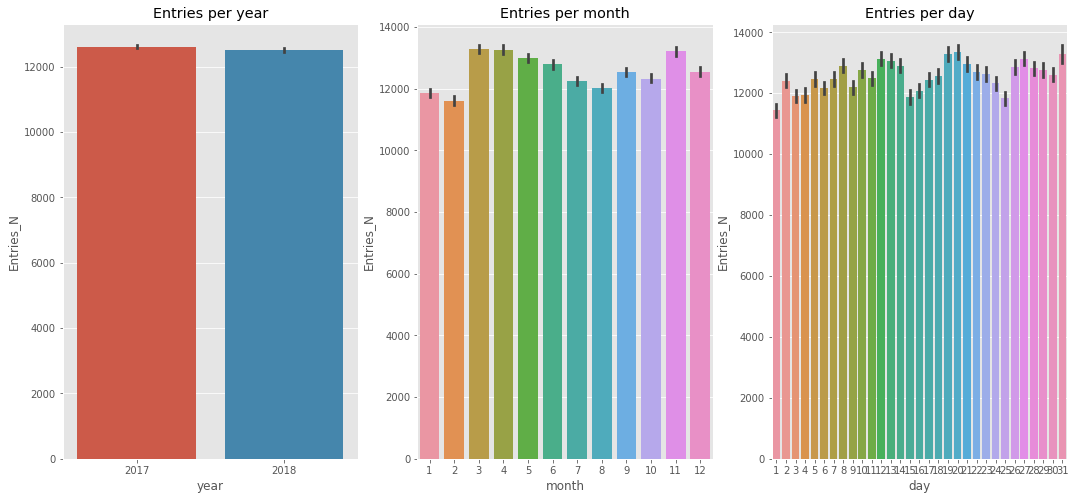

In [28]:
figure, ((ax1,ax2,ax3)) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=total_subway, x="year", y="Entries_N", ax=ax1)
sns.barplot(data=total_subway, x="month", y="Entries_N", ax=ax2)
sns.barplot(data=total_subway, x="day", y="Entries_N", ax=ax3)

ax1.set(ylabel='Entries_N',title="Entries per year")
ax2.set(xlabel='month',title="Entries per month")
ax3.set(xlabel='day',title="Entries per day")

In [29]:
#미세먼지 데이터 정리하기
#엑셀에서 이미 결측치 제거된 상태



In [30]:
fine_dust = pd.read_csv('fine_dust.csv', encoding='EUC-KR')
ultrafine_dust = pd.read_csv('ultrafine_dust.csv', encoding='EUC-KR')

fine_dust.columns = ['Date','fine_dust']
ultrafine_dust.columns = ['Date','ultrafine_dust']

ultrafine_dust.head()

,Date,ultrafine_dust
0,20170101,58
1,20170101,58
2,20170101,54
3,20170101,65
4,20170101,54


In [31]:
fine_dust['Date'] = pd.to_datetime(fine_dust['Date'], format ='%Y%m%d')
ultrafine_dust['Date'] = pd.to_datetime(ultrafine_dust['Date'], format ='%Y%m%d')

ultrafine_dust.dtypes

Date              datetime64[ns]
ultrafine_dust             int64
dtype: object

In [32]:
fine_dust = fine_dust.groupby(['Date'],as_index=False).mean()
ultrafine_dust = ultrafine_dust.groupby(['Date'],as_index=False).mean()

ultrafine_dust.head()



,Date,ultrafine_dust
0,2017-01-01,60.09375
1,2017-01-02,81.34375
2,2017-01-03,52.31250
3,2017-01-04,36.00000
4,2017-01-05,23.06250


In [33]:
#미세먼지 컬럼 추가하기
total_subway_dust = total_subway.join(fine_dust.set_index('Date'), on='Date')
total_subway_dust = total_subway_dust.join(ultrafine_dust.set_index('Date'), on='Date')
total_subway_dust.dtypes
total_subway_dust.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375


In [34]:
#날씨 데이터 정리하기
#엑셀에서 이미 결측치 제거된 상태

In [35]:
weather = pd.read_csv('weather.csv', encoding='EUC-KR')
weather.columns = ['Date','Temperature','Humidity','Wind','Precipitation']

weather.head()

,Date,Temperature,Humidity,Wind,Precipitation
0,20170101,3.2,76.300003,0.1,0.0
1,20170101,3.6,78.099998,0.5,0.0
2,20170101,3.7,78.199997,0.7,0.0
3,20170101,4.6,77.800003,1.2,0.0
4,20170101,4.4,68.500000,0.3,0.0


In [36]:
weather['Date'] = pd.to_datetime(weather['Date'], format ='%Y%m%d')

weather.dtypes

Date             datetime64[ns]
Temperature             float64
Humidity                float64
Wind                    float64
Precipitation           float64
dtype: object

In [37]:
weather = weather.groupby(['Date'],as_index=False).mean()

weather.head()


,Date,Temperature,Humidity,Wind,Precipitation
0,2017-01-01,3.900000,75.926923,0.769231,0.000000
1,2017-01-02,6.419231,76.288462,1.376923,0.057692
2,2017-01-03,3.569231,62.530770,1.257692,0.000000
3,2017-01-04,5.296154,59.869231,1.038462,0.000000
4,2017-01-05,5.050000,55.300000,1.773077,0.000000


In [40]:
#미세먼지 컬럼 추가하기
total_subway_weather = total_subway_dust.join(weather.set_index('Date'), on='Date')
total_subway_weather.dtypes
total_subway_weather.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0


In [43]:
#요일 코딩하기

total_subway_weather["dayofweek"] = total_subway_weather["Date"].dt.dayofweek
total_subway_weather.head()

,Date,Line,Station_ID,Station_Name,Entries_N,Exits_N,Update_Date,year,month,day,fine_dust,ultrafine_dust,Temperature,Humidity,Wind,Precipitation,dayofweek
0,2017-01-01,경의선,1271,능곡,1958,1864,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
1,2017-01-01,경의선,1272,곡산,242,213,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
2,2017-01-01,경의선,1273,백마,2665,2592,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
3,2017-01-01,경의선,1274,풍산,2356,2314,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6
4,2017-01-01,경의선,1275,일산,4058,4000,20170104,2017,1,1,80.410256,60.09375,3.9,75.926923,0.769231,0.0,6


C:\Users\choimh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0.5,0,'dayofweek'), Text(0.5,1,'Entries per dayofweek')]

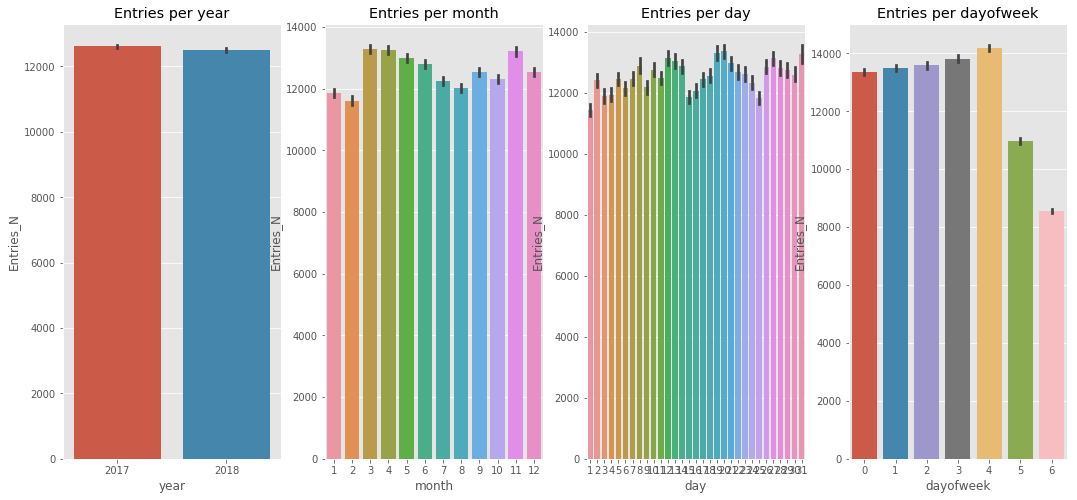

In [44]:
figure, ((ax1,ax2,ax3,ax4)) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(18,8)

sns.barplot(data=total_subway_weather, x="year", y="Entries_N", ax=ax1)
sns.barplot(data=total_subway_weather, x="month", y="Entries_N", ax=ax2)
sns.barplot(data=total_subway_weather, x="day", y="Entries_N", ax=ax3)
sns.barplot(data=total_subway_weather, x="dayofweek", y="Entries_N", ax=ax4)


ax1.set(ylabel='Entries_N',title="Entries per year")
ax2.set(xlabel='month',title="Entries per month")
ax3.set(xlabel='day',title="Entries per day")
ax4.set(xlabel='dayofweek',title="Entries per dayofweek")

[Text(0,0.5,'Entries_N'),
 Text(0.5,0,'dayofweek'),
 Text(0.5,1,'Entries per dayofweek')]

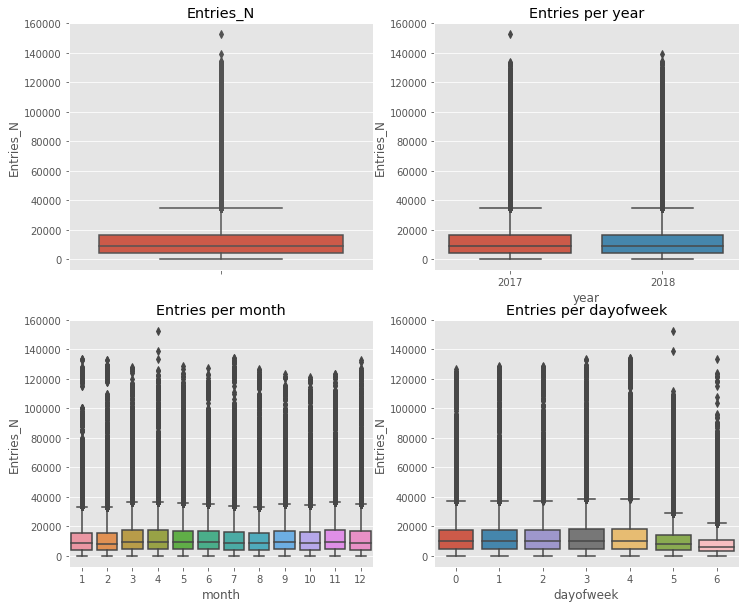

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=total_subway_weather,y="Entries_N",orient="v",ax=axes[0][0])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="year",orient="v",ax=axes[0][1])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="month",orient="v",ax=axes[1][0])
sns.boxplot(data=total_subway_weather,y="Entries_N",x="dayofweek",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Entries_N',title="Entries_N")
axes[0][1].set(xlabel='year',ylabel='Entries_N',title="Entries per year")
axes[1][0].set(xlabel='month',ylabel='Entries_N',title="Entries per month")
axes[1][1].set(xlabel='dayofweek',ylabel='Entries_N',title="Entries per dayofweek")
